# Name : Subhodeep Das
# Status : Intern
# Organisation : The Sparks Foundation
# Task - 1 : Prediction using Supervised ML

### Predict the percentage of marks of an student based on the number of study hours.

## STEP 1 : Importing the Libaries & dataset

### Importing all libraries required for this task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data from remote link and and converting into dataframe

In [2]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()
#printing first 5 rows of dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Step 2 : Visualising Dataset

### Plotting the distribution of scores vs hours

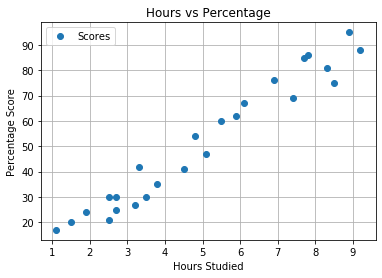

In [3]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [4]:
# we can also use .corr to determine the corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## STEP 3 : Data preparation & Splitting the dataset

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Using iloc function we will divide the data 

In [6]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

### Splitting data into training and testing data(Ratio - 80:20)

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

## Step 4 : Training the Model

#### We have splited our data into training and testing sets, and now we will train our Model.

### Importing and Initialising Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Training the model on the training data

In [11]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Printing the coefficient and intercept of the model after training

In [12]:
lr.coef_

array([[9.91065648]])

In [13]:
lr.intercept_

array([2.01816004])

## STEP 5 : Visualizing the model

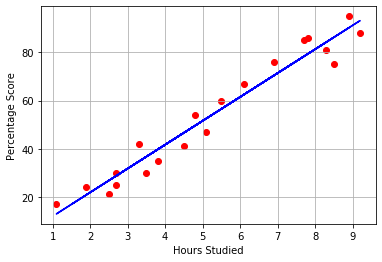

In [14]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.show()
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='Blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## STEP 6 : Making Predictions

### Now that we have trained our model, so make some prediction

In [15]:
print(X_test)
y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing actual and predicated values of a dataframes

In [16]:
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


### Predicting a new value - No. of hours studied = 9.25

In [17]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = [93.69173249]


## Step 7 : Model Evaluation

### The final step is to evaluate the performance of model.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


## Inference : For 9.25 hours of study percentage expected is 93.7 % approx.

## Task 1 Completed. Thanks for reading!!